<a href="https://colab.research.google.com/github/hackerpranavpandey/SOI_Mission_Mars_Terrain/blob/main/Mars_Lander_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Mission_Mars/train.csv'

## Analysing the dataset

In [ ]:
import pandas as pd
df=pd.read_csv(path)

In [ ]:
df.head(10)

,File Name,Class
0,1.jpg,other
1,2.jpg,bright dune
2,3.jpg,other
3,4.jpg,crater
4,5.jpg,other
5,6.jpg,other
6,7.jpg,slope streak
7,8.jpg,bright dune
8,9.jpg,other
9,10.jpg,other


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6201 entries, 0 to 6200
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  6201 non-null   object
 1   Class      6201 non-null   object
dtypes: object(2)
memory usage: 97.0+ KB
None


In [ ]:
import numpy as np
print(f"the shape of label csv fie is : {np.shape(df)}")
print(f" all the unique labels present in the dataset is:{np.unique(df.iloc[:,1:])}")

the shape of label csv fie is : (6201, 2)
 all the unique labels present in the dataset is:['bright dune' 'crater' 'dark dune' 'impact ejecta' 'other' 'slope streak'
 'spider' 'swiss cheese']


In [ ]:
print(df.iloc[:,1:].value_counts())

Class        
other            3651
crater           1062
bright dune       597
slope streak      335
swiss cheese      223
dark dune         216
spider             66
impact ejecta      51
Name: count, dtype: int64


## Extracting image pixel value using cv2 and converting it to rgb format

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn.metrics import classification_report
images=[]
labels=[]
def image_process():
  images_path='/content/drive/MyDrive/Mission_Mars/train_dataset'
  for image_path in os.listdir(images_path):
    label=image_path.split('.')[0]
    label=int(label)-1
    label=df.iloc[label,1:].values
    labels.append(label)
    image_name=os.path.join(images_path,image_path)
    image_array=cv2.imread(image_name,cv2.IMREAD_GRAYSCALE)
    images.append(image_array)
image_process()

## Lets see some images and reshape it to apply machin learning algorithms ahead

['other']


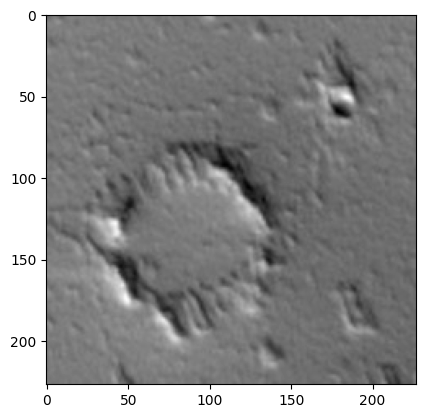

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[246],cmap="gray")
print(labels[246])

In [ ]:
np.shape(images)

(6201, 227, 227)

In [ ]:
## resizing the image
## also converting it to rgb format
resized_images=[]
def reshape():
  for image in images:
    new_array=np.array(cv2.resize(image,(216, 216)))
    rgb_array = np.stack((new_array,)*3,axis=-1)
    resized_images.append(rgb_array)
reshape()

In [ ]:
np.shape(resized_images)

(6201, 216, 216, 3)

['other']


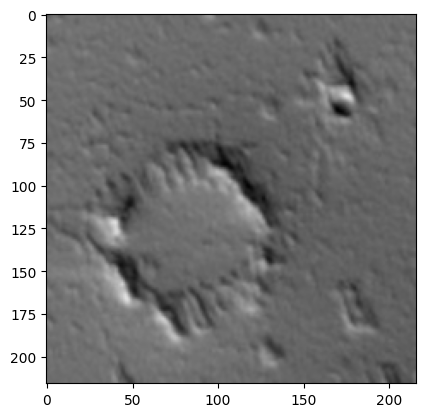

In [ ]:
plt.imshow(resized_images[246])
print(labels[246])

In [ ]:
type(labels[246]),labels[246]
Y=[]
for label in labels:
  Y.append(label[0])
print(Y[0])
np.shape(labels),np.shape(Y),np.shape(images)

swiss cheese


((6201, 1), (6201,), (6201, 227, 227))

## Image rotation to 90,180 and 270 degress to add it for those classes that have less number of images

In [ ]:
## now lets do some data augementation for images with less  number to decrease the model underfitting
def image_augmentation():
  t=len(resized_images)
  for i in range(0,t):
    rotated_array_90=cv2.rotate(resized_images[i], cv2.ROTATE_90_CLOCKWISE)
    rotate_180=cv2.rotate(resized_images[i], cv2.ROTATE_180)
    rotated_array_270 = cv2.rotate(resized_images[i], cv2.ROTATE_90_COUNTERCLOCKWISE)
    if Y[i]=='crater':
      resized_images.append(rotate_180)
      Y.append(Y[i])
    elif Y[i]=="bright dune" or Y[i]=="slope streak" or Y[i]=="swiss cheese" or Y[i]=="dark dune":
      resized_images.append(rotated_array_90)
      Y.append(Y[i])
      resized_images.append(rotate_180)
      Y.append(Y[i])
    elif Y[i]=="spider" or Y[i]=="impact ejecta":
      resized_images.append(rotated_array_90)
      Y.append(Y[i])
      resized_images.append(rotate_180)
      Y.append(Y[i])
      resized_images.append(rotated_array_270)
      Y.append(Y[i])
image_augmentation()

In [ ]:
Y=np.array(Y)
resized_images=np.array(resized_images)
Y.shape,resized_images.shape

((10356,), (10356, 216, 216, 3))

In [ ]:
resized_images=resized_images.reshape(10356,216*216*3)

In [ ]:
Y.shape,resized_images.shape,np.unique(Y)

((10356,),
 (10356, 139968),
 array(['bright dune', 'crater', 'dark dune', 'impact ejecta', 'other',
        'slope streak', 'spider', 'swiss cheese'], dtype='<U13'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(resized_images,Y,test_size=0.2, random_state=42)

## Simple Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(y_pred_lr,y_test)
print("Accuracy with LR:",acc_lr)

In [ ]:
## lets store the acuracy of each model in a list
models_acc=[]
models_acc.append(["LR",acc_lr])

In [ ]:
print(classification_report(y_pred_lr,y_test))

## Decision Tree Classifier along with GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_dt={
    'criterion':['gini','entropy'],
    'max_depth':np.arange(3,20),
    'splitter':['best','random'],

}
grid_search_dt=GridSearchCV(dt,param_dt,cv=2)
grid_search_dt.fit(X_train,y_train)

In [ ]:
y_pred_dt=grid_search_dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))

In [ ]:
acc_dt=accuracy_score(y_test,y_pred_dt)
models_acc.append(["DT",acc_dt])

In [ ]:
grid_search_dt.best_params_

## Random Forest Classifier along with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
params_rf={
    'n_estimators':[100,200,500,300],
    'criterion':['gini','entropy'],
    'max_depth':np.arange(3,20),
    'max_features':['sqrt','log2']
}

In [ ]:
grid_search_rf=GridSearchCV(rf,params_rf,cv=2)
grid_search_rf.fit(X_train,y_train)
y_pred_rf=grid_search_rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))
acc_rf=accuracy_score(y_test,y_pred_rf)
models_acc.append(["RF",acc_rf])

## Using KNN Algorithm with GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn_params={
    'n_neighbors':[10,20,100,500],
    'metric':['euclidean','manhattan','chebyshev'],
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree','kd_tree','brute']
}

In [ ]:
grid_search_knn=GridSearchCV(knn,knn_params,cv=5)
grid_search_knn.fit(X_train,y_train)
y_pred_knn=grid_search_knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))
acc_knn=accuracy_score(y_test,y_pred_knn)
models_acc.append(["KNN",acc_knn])

## XgBoost Algorithm

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(booster="gbtree",n_estimators=100)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [ ]:
integer_mapping={label: encoded_value for label, encoded_value in zip(le.classes_,le.transform(le.classes_))}

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
y_pred_boost=xgb.predict(X_test)
print(classification_report(y_test,y_pred_boost))
acc_boost=accuracy_score(y_test,y_pred_boost)
models_acc.append(["XgBoost",acc_boost])

In [ ]:
import matplotlib.pyplot as plt
model_names,accuracy_scores = zip(*model_acc)
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel("Model Names")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Scores")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()